In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
train_dataset =pd.read_csv('train.csv')

In [60]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
train_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
train_dataset[['LotArea']]

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [63]:
x=train_dataset.iloc[:,4].values.reshape(-1,1)

In [64]:
x

array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]], dtype=int64)

In [65]:
print(train_dataset.shape)

(1460, 81)


In [66]:
y=train_dataset.iloc[:,80].values.reshape(-1,1)
print(y)

[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


In [67]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

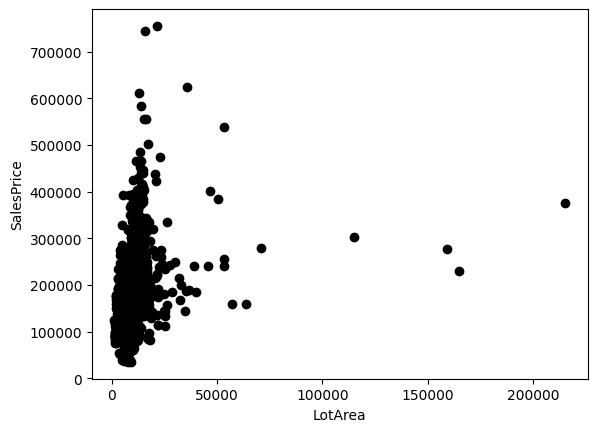

In [68]:
plt.scatter(x,y,color="black")
plt.ylabel("SalesPrice")
plt.xlabel("LotArea")
plt.show()

In [69]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [70]:
train_dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [71]:
reg=linear_model.LinearRegression()
reg

LinearRegression()

In [72]:
reg.fit(x,y)

LinearRegression()

In [73]:
prediction=reg.predict(x)

In [74]:
prediction

array([[176580.91488881],
       [178995.88263327],
       [182460.83635359],
       ...,
       [177824.09828422],
       [179241.57935162],
       [179703.573181  ]])

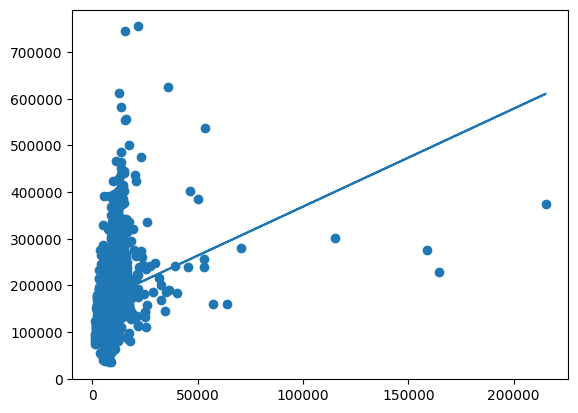

In [75]:
plt.scatter(x,y)
plt.plot(x,prediction)
plt.show()

In [76]:
print(reg.coef_)
print(reg.intercept_)

[[2.09997195]]
[158836.15189688]


In [77]:
random_no=np.random.rand(20).reshape(-1,1)

In [78]:
random_no

array([[0.00500035],
       [0.5537987 ],
       [0.69470107],
       [0.70358203],
       [0.74209543],
       [0.73797705],
       [0.67636309],
       [0.66292256],
       [0.92363527],
       [0.08440225],
       [0.19403696],
       [0.06570967],
       [0.45237752],
       [0.94221611],
       [0.60378967],
       [0.00261372],
       [0.07366164],
       [0.45692225],
       [0.5521283 ],
       [0.20437121]])

In [79]:
random_no_2=np.random.rand(20).reshape(-1,1)

In [80]:
random_no_2

array([[0.85367136],
       [0.1411978 ],
       [0.10914611],
       [0.10817425],
       [0.85534998],
       [0.75255679],
       [0.10124655],
       [0.34063604],
       [0.07816277],
       [0.67921959],
       [0.10090715],
       [0.3574938 ],
       [0.33122977],
       [0.28995313],
       [0.79488109],
       [0.52899583],
       [0.62659119],
       [0.45099864],
       [0.4445204 ],
       [0.95562208]])

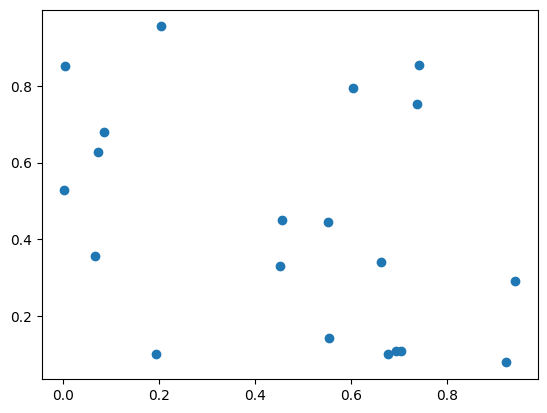

In [81]:
plt.scatter(random_no,random_no_2)
plt.show()

In [82]:
regression=linear_model.LinearRegression()

In [83]:
regression.fit(random_no,random_no_2)

LinearRegression()

In [84]:
prediction=regression.predict(random_no)

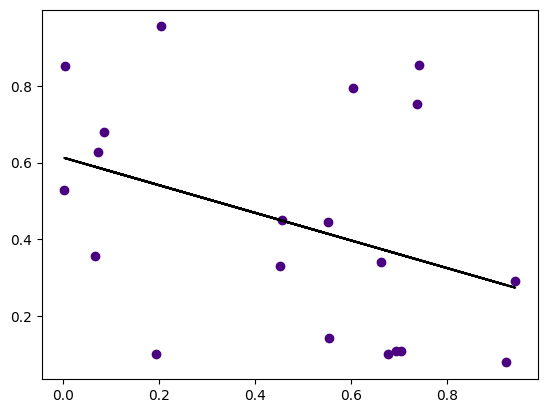

In [85]:
plt.scatter(random_no,random_no_2,color="indigo")
plt.plot(random_no,prediction,color="black")
plt.show()

In [86]:
regression.coef_

array([[-0.36069676]])

In [87]:
regression.intercept_

array([0.61333432])

In [88]:
dairy=pd.read_csv("dairy_dataset.csv")

In [89]:
dairy.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [90]:
dairy.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [91]:
cows=dairy.iloc[:,2].values.reshape(-1,1)

In [92]:
cows

array([[96],
       [44],
       [24],
       ...,
       [65],
       [90],
       [58]], dtype=int64)

In [93]:
Total_Revenue=dairy.iloc[:,17].values.reshape(-1,1)

In [94]:
Total_Revenue

array([[5.756800e+02],
       [2.189592e+04],
       [8.655360e+03],
       ...,
       [1.261386e+04],
       [2.112000e+01],
       [1.857735e+04]])

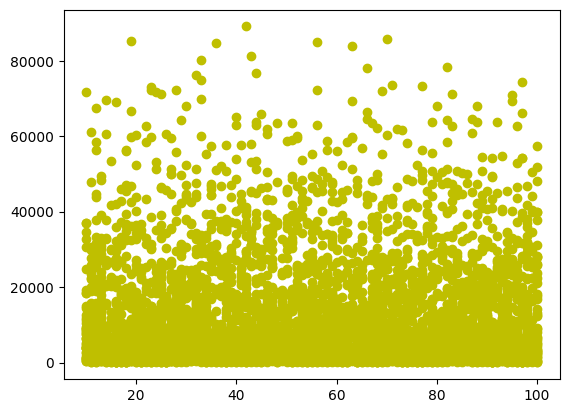

In [95]:
plt.scatter(cows,Total_Revenue,color="y")
plt.show()

In [96]:
dairy.shape
dairy.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [97]:
regress=linear_model.LinearRegression()

In [98]:
regress.fit(cows,Total_Revenue)

LinearRegression()

In [99]:
Predict=regress.predict(cows)

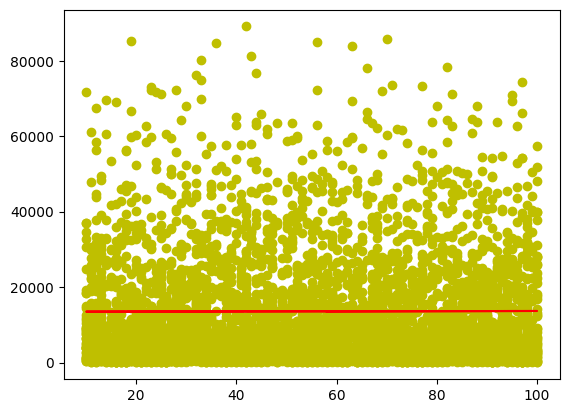

In [100]:
plt.scatter(cows,Total_Revenue,color="y")
plt.plot(cows,Predict,color="r")
plt.show()

In [101]:
regress.coef_

array([[1.93767923]])

In [102]:
regress.intercept_

array([13473.76338217])

In [103]:
House_Price =pd.read_excel("HousePrice.xlsx")

In [104]:
House_Price

,Area,Prices,Location
0,56600,637300.0,Delhi
1,60000,750000.0,Mumbai
2,44000,880000.0,Pilani
3,63000,120000.0,Nainital
4,32000,222000.0,Noida
5,12000,463000.0,Jaipur
6,22000,420000.0,Jodhpur
7,23000,NaN,Delhi
8,44000,770000.0,Punjab
9,20000,778000.0,UP


In [105]:
House_Price.Prices=House_Price.Prices.fillna(538809)
House_Price

,Area,Prices,Location
0,56600,637300.0,Delhi
1,60000,750000.0,Mumbai
2,44000,880000.0,Pilani
3,63000,120000.0,Nainital
4,32000,222000.0,Noida
5,12000,463000.0,Jaipur
6,22000,420000.0,Jodhpur
7,23000,538809.0,Delhi
8,44000,770000.0,Punjab
9,20000,778000.0,UP


In [106]:
x=House_Price.iloc[ :,0].values.reshape(-1,1)
x

array([[56600],
       [60000],
       [44000],
       [63000],
       [32000],
       [12000],
       [22000],
       [23000],
       [44000],
       [20000],
       [46500],
       [44000],
       [60300],
       [11000],
       [13200]], dtype=int64)

In [107]:
y=House_Price.iloc[ :,1].values.reshape(-1,1)

In [108]:
print(y)
regssion =linear_model.LinearRegression()

[[637300.]
 [750000.]
 [880000.]
 [120000.]
 [222000.]
 [463000.]
 [420000.]
 [538809.]
 [770000.]
 [778000.]
 [538809.]
 [787600.]
 [ 99000.]
 [538809.]
 [538809.]]


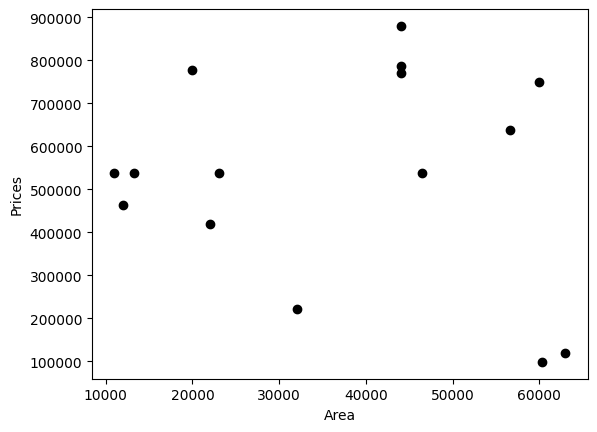

,Area,Prices
count,15.000000,15.000000
mean,36773.333333,538809.066667
std,18843.280980,243828.899185
min,11000.000000,99000.000000
25%,21000.000000,441500.000000
50%,44000.000000,538809.000000
75%,51550.000000,760000.000000
max,63000.000000,880000.000000


In [109]:
plt.scatter(x,y,color="black")
plt.xlabel("Area")
plt.ylabel("Prices")
plt.show()
House_Price.describe()

In [110]:
House_Price=House_Price.Prices.fillna(538809)

In [111]:
regssion.fit(x,y)
p=regssion.predict(x)

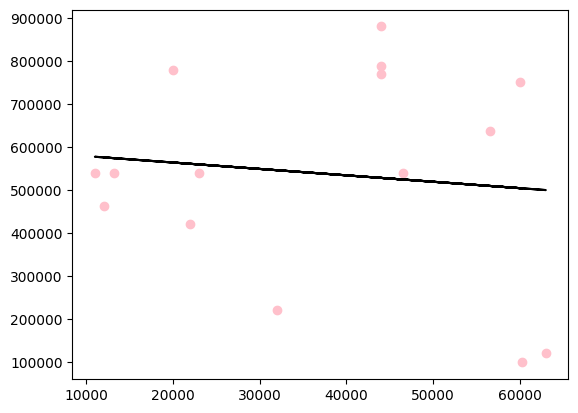

In [112]:
plt.scatter(x,y,color="pink")
plt.plot(x,p,color="black")
plt.show()

In [113]:
regssion.coef_


array([[-1.48972914]])

In [114]:
regssion.intercept_

array([593591.37293357])